Within this notebook I download the three raster variables:

raster layers variables:

    soil_var = soil/
                pH
                mean
                100-200cm
        source: http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/

    elevation_var = elevation
        source: https://github.com/nsidc/earthaccess/

    climate_var = climate
        source: https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/intro-to-MACAv2-cmip5-data/


In [3]:
#store the data
%store -r

Unable to restore variable 'band_dict', ignoring (use %store -d to forget!)
The error was: <class 'KeyError'>
Unable to restore variable 'ndvi_da', ignoring (use %store -d to forget!)
The error was: <class 'KeyError'>


In [6]:
#Import libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import zipfile
import rasterio
from rasterio.plot import show
import rioxarray

Soil variable



In [7]:
#creating data directory folders for the downloaded data using os and pathlib


#make soils data folder
os.makedirs("C:/Users/arago/Documents/GitHub/habitatmodel-main/studyarea_data/soils", exist_ok=True)

#create variable with the path
os.path.join("C:/Users/arago/Documents/GitHub/habitatmodel-main/studyarea_data/soils")

'C:/Users/arago/Documents/GitHub/habitatmodel-main/studyarea_data/soils'

Pawnee National Grassland

In [8]:
#This will show my bounds of lat long of which dataset to download for the Pawnee National Grassland

usfs_gdf[usfs_gdf.GRASSLANDN=="Pawnee National Grassland"].total_bounds

#"http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/100_200/lat4041_lon-104-103.tif"

array([-104.7914421 ,   40.60956304, -103.57328565,   41.00184675])

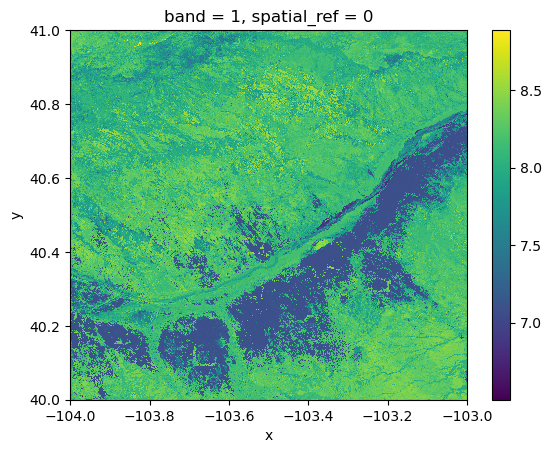

In [9]:
usfs_gdf[usfs_gdf.GRASSLANDN=="Pawnee National Grassland"].total_bounds

#Plotting using rioxarray to view the soil pH direct from the .tif before saving
pawnee_url="http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/100_200/lat4041_lon-104-103.tif"
pawnee_ph=rioxarray.open_rasterio(pawnee_url)

pawnee_ph.plot()

<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

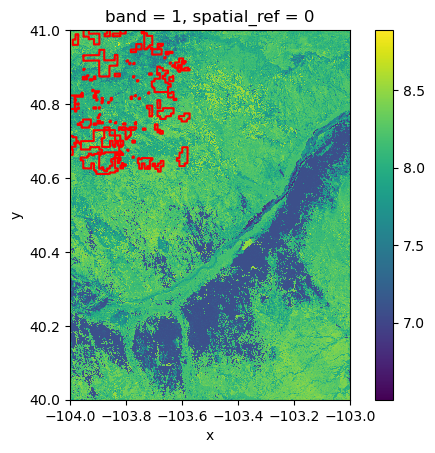

In [10]:
#plotting using matplotlib in order to view the soils ph layer and the grasslands layer overlayed

pawnee_ph.plot()
usfs_gdf[usfs_gdf.GRASSLANDN=="Pawnee National Grassland"].boundary.plot(color= "red", ax=plt.gca())

In [11]:
#viewing data with the cloud mask

# cloud_path = glob(os.path.join(hls_dir, '*Fmask*.tif'))[0]
# cloud_da = rxr.open_rasterio(cloud_path, mask_and_scale=True).squeeze()
# cloud_da.plot()



Kiowa National Grassland

In [12]:
#This will show my bounds of lat long of which dataset to download for the Kiowa National Grassland

usfs_gdf[usfs_gdf.GRASSLANDN=="Kiowa National Grassland"].total_bounds

#http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/100_200/lat3637_lon-105-104.tif

array([-104.40689283,   35.93914469, -103.00238243,   36.69822981])

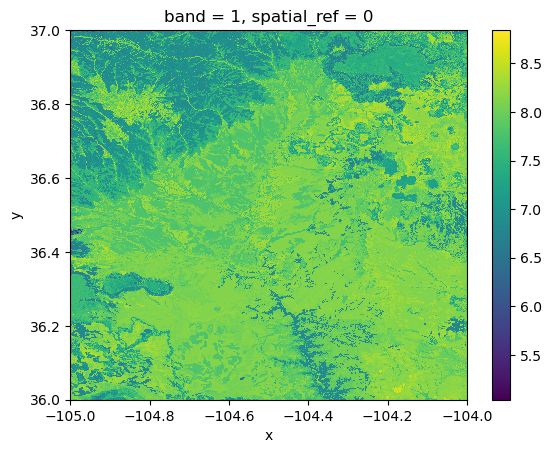

In [13]:
#Plotting using rioxarray to view the soil pH direct from the .tif before saving

kiowa_url="http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/100_200/lat3637_lon-105-104.tif"
kiowa_ph=rioxarray.open_rasterio(kiowa_url)

kiowa_ph.plot()

<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

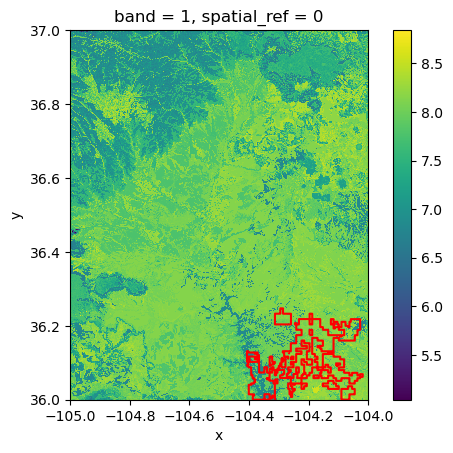

In [14]:
#plotting using matplotlib in order to view the soils ph layer and the grasslands layer overlayed

kiowa_ph.plot()
usfs_gdf[usfs_gdf.GRASSLANDN=="Kiowa National Grassland"].boundary.plot(color= "red", ax=plt.gca())


Download soil variable

In [15]:
#Creating variable and directories for the downloaded soil tifs 

soil_kiowa_url="http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/100_200/lat3637_lon-105-104.tif" 
soil_pawnee_url = "http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/100_200/lat4041_lon-104-103.tif"
soil_tif_data = r"C:/Users/arago/Documents/GitHub/habitatmodel-main/studyarea_data/soils"
soil_kiowa_name="lat3637_lon-105-104.tif"
soil_pawnee_name="lat4041_lon-104-103.tif"

soil_data_urls= [soil_kiowa_url,
                 soil_pawnee_url]

#Downloading the soil data tifs

for idx, url in enumerate(soil_data_urls):
    try:
        response=requests.get(url)
        response.raise_for_status()#checks for HTTP errors

        #extract file name from URL or generate one
        file_name=os.path.join(soil_tif_data, f"file_{idx+1}.tif")

        # Save the file
        with open(file_name, "wb") as file:
            file.write(response.content)
        print(f"Downloaded: {file_name}")
    except requests.exceptions.RequestException as e:
        print(f"Failed to download {url}: {e}")

Downloaded: C:/Users/arago/Documents/GitHub/habitatmodel-main/studyarea_data/soils\file_1.tif
Downloaded: C:/Users/arago/Documents/GitHub/habitatmodel-main/studyarea_data/soils\file_2.tif


In [ ]:
# # Step 1: Load the vector data (GeoDataFrame) - example: a shapefile of states
# states_gdf = gpd.read_file("states_queried_gdf")

# # Step 2: Load the raster data (GeoTIFF) using rasterio
# kiowa_tif_file = "soil_kiowa_name"

# # Open the GeoTIFF file
# with rasterio.open(tif_file) as src:
#     # Step 3: Read the data from the first band (for grayscale image)
#     raster_data = src.read(1)
#     raster_transform = src.transform

# # Step 4: Plot the raster (GeoTIFF) first
# fig, ax = plt.subplots(figsize=(10, 8))

# # Display the raster
# show(raster_data, transform=raster_transform, ax=ax, cmap='viridis')

# # Step 5: Overlay the GeoDataFrame (vector data) on top of the raster
# gdf.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2)

# # Add titles and labels
# ax.set_title("GeoTIFF with GeoDataFrame Overlay", fontsize=16)
# ax.set_xlabel("Longitude", fontsize=12)
# ax.set_ylabel("Latitude", fontsize=12)

# # Show the map
# plt.show()

DataSourceError: states_queried_gdf: No such file or directory

Download elevation data 

In [16]:
#extract the bounding box of the Kiowa National Grasslands in preparation for downloading the elevation data

kiowa_grasslands_bounds=tuple(usfs_gdf[usfs_gdf.GRASSLANDN=="Kiowa National Grassland"].total_bounds)

#extract the bounding box of the Pawnee National Grassland

pawnee_grasslands_bounds=tuple(usfs_gdf[usfs_gdf.GRASSLANDN=="Pawnee National Grassland"].total_bounds)

In [17]:
#creating data directory folders for the elevation downloaded data using os and pathlib


#make elevation data folder
os.makedirs("C:/Users/arago/Documents/GitHub/habitatmodel-main/studyarea_data/elevation", exist_ok=True)

#create variable with the path
os.path.join("C:/Users/arago/Documents/GitHub/habitatmodel-main/studyarea_data/elevation")

'C:/Users/arago/Documents/GitHub/habitatmodel-main/studyarea_data/elevation'

In [19]:
import earthaccess

elevation_tif_data = r"C:/Users/arago/Documents/GitHub/habitatmodel-main/studyarea_data/elevation"
#https://github.com/nsidc/earthaccess/

#my profile site: https://urs.earthdata.nasa.gov/

#DEM site search data: https://search.earthdata.nasa.gov/search

# 1. Login
earthaccess.login()

# 2. Search
results = earthaccess.search_data(
    short_name='CIESIN_SEDAC_DEDC_ACE_V2',  # ATLAS/ICESat-2 L3A Land Ice Height
    bounding_box=(pawnee_grasslands_bounds),  # Only include files in area of interest...
    temporal=("1999-02", "2019-03"),  # ...and time period of interest.
    count=10
)

# 3. Access
files = earthaccess.download(results, elevation_tif_data)

print(f"Downloaded: {elevation_tif_data}")

c:\Users\arago\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
QUEUEING TASKS | : 100%|██████████| 4/4 [00:00<00:00, 707.90it/s]
PROCESSING TASKS | : 100%|██████████| 4/4 [00:00<00:00, 3683.25it/s]
COLLECTING RESULTS | : 100%|██████████| 4/4 [00:00<00:00, 16529.28it/s]

Downloaded: C:/Users/arago/Documents/GitHub/habitatmodel-main/studyarea_data/elevation


In [20]:
datasets = earthaccess.search_datasets(keyword='ACE2')

for dataset in datasets:
    print(dataset['umm']['ShortName'], dataset['umm']['EntryTitle'])

CIESIN_SEDAC_DEDC_ACE_V2 Altimeter Corrected Elevations, Version 2 (ACE2)
CIESIN_SEDAC_WACVM_SUBSETACE2 West Africa Coastal Vulnerability Mapping: Subset of High and Low Resolution Altimeter Corrected Elevations 2 (ACE2)


In [25]:
files

['elevation_tif_data\\dedc-ace-v2_30N105W_3sec.zip',
 'elevation_tif_data\\dedc-ace-v2_30N105W_9sec.zip',
 'elevation_tif_data\\dedc-ace-v2_30N105W_30sec.zip',
 'elevation_tif_data\\dedc-ace-v2_30N105W_5min.zip']

In [ ]:
#unzip elevation data files: 

# "C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation\dedc-ace-v2_30N105W_30sec.zip"
# "C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation\dedc-ace-v2_30N105W_3sec.zip"
# "C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation\dedc-ace-v2_30N105W_5min.zip"
# "C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation\dedc-ace-v2_30N105W_9sec.zip"

#setting variables and identifying directories
# elev3sec_data = r"C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation\dedc-ace-v2_30N105W_3sec.zip"
# elev5min_data = r"C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation\dedc-ace-v2_30N105W_5min.zip"
# elev9sec_data = r"C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation\dedc-ace-v2_30N105W_9sec.zip"
# elev30sec_data = r"C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation\dedc-ace-v2_30N105W_30sec.zip"
# elev3sec_file_name="dedc-ace-v2_30N105W_3sec.zip"
# elev5min_file_name="dedc-ace-v2_30N105W_5min"
# elev9sec_file_name="dedc-ace-v2_30N105W_9sec"
# elev30sec_file_name="dedc-ace-v2_30N105W_30sec"

# elev3sec_data_extract = r"C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation"
# elev5min_data_extract = r"C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation"
# elev9sec_data_extract = r"C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation"
# elev30sec_data_extract = r"C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation"

# elev3sec_zip_path= os.path.join(elev3sec_data, elev3sec_file_name)
# elev3sec_path=os.path.join(elev3sec_data,'dedc-ace-v2_30N105W_3sec.zip')

# elev5min_zip_path= os.path.join(elev5min_data, elev5min_file_name)
# elev5min_path=os.path.join(elev5min_data,'dedc-ace-v2_30N105W_5min')

# elev9sec_zip_path= os.path.join(elev9sec_data, elev9sec_file_name)
# elev9sec_path=os.path.join(elev9sec_data,'dedc-ace-v2_30N105W_9sec')

# elev30sec_zip_path= os.path.join(elev30sec_data, elev30sec_file_name)
# elev30sec_path=os.path.join(elev30sec_data,'dedc-ace-v2_30N105W_30sec')

# # extract ZIP file
# def extract_zip(zip_file_path, extract_to):
#     try:
#         print(f"Extracting {zip_file_path}...")
#         with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#             zip_ref.extractall(extract_to)
#         print(f"Contents extracted to: {extract_to}")
#     except zipfile.BadZipFile as e:
#         print(f"Error: The file is not a valid ZIP archive: {e}")

# # Step 2: Extract the elev ZIP files as list
# for zip_path, extract_path, zip_name in [
#     (elev3sec_zip_path, elev3sec_data_extract, elev3sec_path),
#     (elev5min_zip_path, elev5min_data_extract, elev5min_path),
#     (elev9sec_zip_path, elev9sec_data_extract, elev9sec_path),
#     (elev30sec_zip_path, elev30sec_data_extract, elev30sec_path)
# ]:
#     if not os.path.exists(extract_path):
#         extract_zip(zip_path, extract_path)
#     else:
#         print(f"Extracted directory already exists at: {extract_path}")





Extracted directory already exists at: C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation
Extracted directory already exists at: C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation
Extracted directory already exists at: C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation
Extracted directory already exists at: C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation


In [ ]:
#copied from chatgpt because code was not working
# Setting variables and identifying directories
elev3sec_data = r"C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation"
elev5min_data = r"C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation"
elev9sec_data = r"C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation"
elev30sec_data = r"C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation"

elev3sec_file_name = "dedc-ace-v2_30N105W_3sec.zip"
elev5min_file_name = "dedc-ace-v2_30N105W_5min.zip"
elev9sec_file_name = "dedc-ace-v2_30N105W_9sec.zip"
elev30sec_file_name = "dedc-ace-v2_30N105W_30sec.zip"

# Defining extraction directories
elev3sec_data_extract = r"C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation"
elev5min_data_extract = r"C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation"
elev9sec_data_extract = r"C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation"
elev30sec_data_extract = r"C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation"

# Defining the full file paths
elev3sec_zip_path = os.path.join(elev3sec_data, elev3sec_file_name)
elev5min_zip_path = os.path.join(elev5min_data, elev5min_file_name)
elev9sec_zip_path = os.path.join(elev9sec_data, elev9sec_file_name)
elev30sec_zip_path = os.path.join(elev30sec_data, elev30sec_file_name)

# Defining extraction directories without the '.zip' extension
elev3sec_path = os.path.join(elev3sec_data_extract, elev3sec_file_name.replace(".zip", ""))
elev5min_path = os.path.join(elev5min_data_extract, elev5min_file_name.replace(".zip", ""))
elev9sec_path = os.path.join(elev9sec_data_extract, elev9sec_file_name.replace(".zip", ""))
elev30sec_path = os.path.join(elev30sec_data_extract, elev30sec_file_name.replace(".zip", ""))

# Function to extract ZIP file
def extract_zip(zip_file_path, extract_to):
    try:
        print(f"Extracting {zip_file_path}...")
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
        print(f"Contents extracted to: {extract_to}")
    except zipfile.BadZipFile as e:
        print(f"Error: The file is not a valid ZIP archive: {e}")

# Step 2: Extract the ZIP files as a list
for zip_path, extract_path in [
    (elev3sec_zip_path, elev3sec_path),
    (elev5min_zip_path, elev5min_path),
    (elev9sec_zip_path, elev9sec_path),
    (elev30sec_zip_path, elev30sec_path)
]:
    if not os.path.exists(extract_path):  # Check if the extraction directory already exists
        os.makedirs(extract_path, exist_ok=True)  # Create extraction directory if it doesn't exist
        extract_zip(zip_path, extract_path)
    else:
        print(f"Extracted directory already exists at: {extract_path}")

Extracting C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation\dedc-ace-v2_30N105W_3sec.zip...
Error: The file is not a valid ZIP archive: File is not a zip file
Extracting C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation\dedc-ace-v2_30N105W_5min.zip...
Error: The file is not a valid ZIP archive: File is not a zip file
Extracting C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation\dedc-ace-v2_30N105W_9sec.zip...
Error: The file is not a valid ZIP archive: File is not a zip file
Extracting C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\elevation\dedc-ace-v2_30N105W_30sec.zip...
Error: The file is not a valid ZIP archive: File is not a zip file


Download climate data

Data downloaded from: http://thredds.northwestknowledge.net:8080/thredds/reacch_climate_CMIP5_macav2_catalog2.html

http://thredds.northwestknowledge.net:8080/thredds/catalog/MACAV2/CNRM-CM5/catalog.html

tutorial to download: https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/get-maca-2-climate-data-netcdf-python/

In [31]:
#creating data directory folders for the downloaded data using os and pathlib


#make climate data folder
os.makedirs("C:/Users/arago/Documents/GitHub/habitatmodel-main/studyarea_data/climate", exist_ok=True)

#create variable with the path
climate_var=os.path.join("C:/Users/arago/Documents/GitHub/habitatmodel-main/studyarea_data/climate")

In [57]:
# copied tutorial code from: tutorial to download link above

# Import packages
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

# Plotting options
sns.set(font_scale=1.3)
sns.set_style("white")


# Models to chose from
model_name = ('bcc-csm1-1')
            #   'bcc-csm1-1-m',
            #   'BNU-ESM',
            #   'CanESM2',
            #   'CCSM4',
            #   'CNRM-CM5',
            #   'CSIRO-Mk3-6-0',
            #   'GFDL-ESM2G',
            #   'GFDL-ESM2M',
            #   'HadGEM2-CC365',
            #   'HadGEM2-ES365',
            #   'inmcm4',
            #   'IPSL-CM5A-MR',
            #   'IPSL-CM5A-LR',
            #   'IPSL-CM5B-LR',
            #   'MIROC5',
            #   'MIROC-ESM',
            #   'MIROC-ESM-CHEM',
            #   'MRI-CGCM3',
            #   'NorESM1-M')

# These are the variable options for the met data
#variable_name = ('tasmax',
#                  'tasmin',
#                  'rhsmax',
#                  'rhsmin',
#                  'pr',
#                  'rsds',
#                  'uas',
#                  'vas',
#                  'huss')

# These are var options in long form
var_airtemp = ('air_temperature')
                #  'air_temperature',
                #  'relative_humidity',
                #  'relative_humidity',
                #  'precipitation',
                #  'surface_downwelling_shortwave_flux_in_air',
                #  'eastward_wind',
                #  'northward_wind',
                #  'specific_humidity')

# This is the base url required to download data from the thredds server.
dir_path = 'http://thredds.northwestknowledge.net:8080/thredds/dodsC/'

# These are the variable options for the met data
# variable_name = ('tasmax',
#                  'tasmin',
#                  'rhsmax',
#                  'rhsmin',
#                  'pr',
#                  'rsds',
#                  'uas',
#                  'vas',
#                  'huss')

# # These are var options in long form
# var_long_name = ('air_temperature',
#                  'air_temperature',
#                  'relative_humidity',
#                  'relative_humidity',
#                  'precipitation',
#                  'surface_downwelling_shortwave_flux_in_air',
#                  'eastward_wind',
#                  'northward_wind',
#                  'specific_humidity')

# # Models to chose from
# model_name = ('bcc-csm1-1',
#               'bcc-csm1-1-m',
#               'BNU-ESM',
#               'CanESM2',
#               'CCSM4',
#               'CNRM-CM5',
#               'CSIRO-Mk3-6-0',
#               'GFDL-ESM2G',
#               'GFDL-ESM2M',
#               'HadGEM2-CC365',
#               'HadGEM2-ES365',
#               'inmcm4',
#               'IPSL-CM5A-MR',
#               'IPSL-CM5A-LR',
#               'IPSL-CM5B-LR',
#               'MIROC5',
#               'MIROC-ESM',
#               'MIROC-ESM-CHEM',
#               'MRI-CGCM3',
#               'NorESM1-M')

# Scenarios
scenario_type = ('historical', 'rcp45', 'rcp85')

# Year start and ends (historical vs projected)
year_start = ('1950', '2006', '2006')
year_end = ('2005', '2099', '2099')
run_num = [1] * 20
run_num[4] = 6  # setting CCSM4 with run 6
domain = 'CONUS'

# Model options between 0-19
model = 1
# Options 0-8 will work for var. Var maps to the variable name below
var = 1
# Options range from 0-2
scenario = 1

try: 
    print("Great! You have selected: \n \u2705 Variable: {} \n \u2705 Model: {}, "
      "\n \u2705 Scenario: {}".format(var_airtemp[var], 
                                      model_name[model],
                                      scenario_type[scenario]))
except IndexError as e:
    raise IndexError("Oops, it looks like you selected value that is "
                     "not within the range of values which is 0-2. please look"
                     "closely at your selected values.")





Great! You have selected: 
 ✅ Variable: i 
 ✅ Model: c, 
 ✅ Scenario: rcp45


In [58]:
try:
    time = year_start[scenario]+'_' + year_end[scenario]
    print("\u2705 Your selected time period is:", time)
except IndexError as e:
    raise IndexError("Oops, it looks like you selected a scenario value that is \
                     not within the range of values which is 0-2")
    


✅ Your selected time period is: 2006_2099


In [59]:
# This code creates a path to the monthly MACA v2 data
file_name = ('agg_macav2metdata_' +
             str(var_airtemp[var]) +
             '_' +
             str(model_name[model]) +
             '_r' +
             str(run_num[model])+'i1p1_' +
             str(scenario_type[scenario]) +
             '_' +
             time + '_' +
             domain + '_monthly.nc')

print("\u2705 You are accessing:\n", file_name, "\n data in netcdf format")


✅ You are accessing:
 agg_macav2metdata_i_c_r1i1p1_rcp45_2006_2099_CONUS_monthly.nc 
 data in netcdf format


In [60]:
full_file_path = dir_path + file_name
print("The full path to your data is: \n", full_file_path)


The full path to your data is: 
 http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_macav2metdata_i_c_r1i1p1_rcp45_2006_2099_CONUS_monthly.nc


In [61]:
# Open the data from the thredds server
try:
    max_temp_xr = xr.open_dataset(full_file_path)
except OSError as oe:
    print("Oops, it looks like the file that you are trying to connect to, "
          "{}, doesn't exist. Try to revisit your model options to ensure "
          "the data exist on the server.  ".format(full_file_path))


Oops, it looks like the file that you are trying to connect to, http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_macav2metdata_i_c_r1i1p1_rcp45_2006_2099_CONUS_monthly.nc, doesn't exist. Try to revisit your model options to ensure the data exist on the server.  


In [62]:
# Open the data from the thredds server
try:
    max_temp_xr = xr.open_dataset(full_file_path)
except OSError as oe:
    print("Oops, it looks like the file that you are trying to connect to, "
          "{}, doesn't exist. Try to revisit your model options to ensure "
          "the data exist on the server.  ".format(full_file_path))


Oops, it looks like the file that you are trying to connect to, http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_macav2metdata_i_c_r1i1p1_rcp45_2006_2099_CONUS_monthly.nc, doesn't exist. Try to revisit your model options to ensure the data exist on the server.  


In [63]:
# View your temperature data
max_temp_xr


NameError: name 'max_temp_xr' is not defined

In [ ]:
#subset data
 Select the latitude, longitude, and timeframe to subset the data to

# Ensure your latitude value is between 25 and 50, and your longitude value is between 235 and 292
# latitude = 35
# longitude = 270
start_date = '2008-01'
end_date = '2012-09'

# Select a lat / lon location that you wish to use to extract the data
latitude = max_temp_xr.lat.values[300]
longitude = max_temp_xr.lon.values[150]
print("You selected the following x,y location:", longitude, latitude)

You selected the following x,y location: 241.4777374267578 37.5628776550293

# Slice one lat/lon data point
temp_single_point = max_temp_xr["air_temperature"].sel(
    lat=latitude,
    lon=longitude)

temp_single_point

# Quick plot of the data
temp_single_point.plot.line()
plt.show()


In [ ]:
%store usfs_df usfs_gdf studyarea_data counties_gdf states_gdf states_df counties_df usfs_shp_path counties_shp_path states_shp_path states_queried_gdf counties_queried_gdf usfs_queried_gdf study_site1_gdf study_site2_gdf 